In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y),n_col))
    for i in range(len(Y)):
        binarized[i,Y[i]] = 1
    return binarized

def from_one_hot(Y):
    arr = np.zeros((len(Y),1))
    for i in range(len(Y)):
        arr[i] = np.nonzero(Y[i]) + 1
    return arr

def sigmoid(x, deriv = False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [3]:
iris = pd.read_csv("Datasets/Iris.csv")

/home/hadron/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


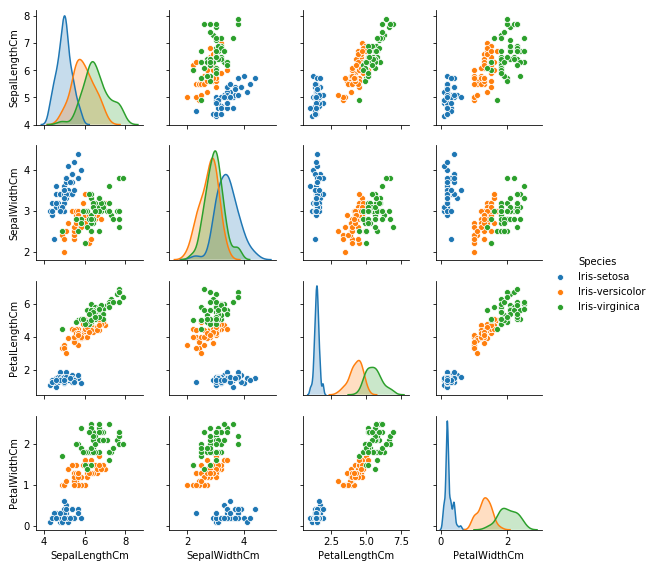

In [4]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", height=2, diag_kind="kde")

In [5]:
iris['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

#Get input
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris, columns=columns)
x = normalize(x.values)

#Get Output, flatten and encode to one-hot
columns = ['Species']
y = pd.DataFrame(iris, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(100, 3) (100, 5) (100, 5)
(

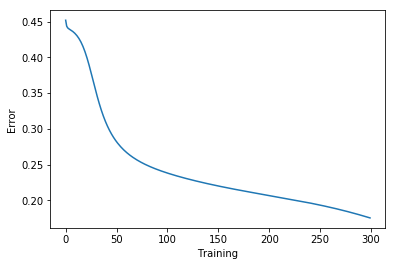

Training Accuracy 82.46%


In [7]:
#Weights
w0 = 2*np.random.random((4, 5)) - 1 #for input   - 4 inputs, 3 outputs
w1 = 2*np.random.random((5, 3)) - 1 #for layer 1 - 5 inputs, 3 outputs

#learning rate
n = 0.1

#Errors - for graph later
errors = []

#Train
for i in range(300):

    #Feed forward
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    #Back propagation using gradient descent
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid(layer2, deriv=True)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid(layer1, deriv=True)
    
    print(layer2_delta.shape, layer1_delta.shape, layer1.shape)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100

#Plot the accuracy chart
plt.plot(errors)
plt.xlabel('Training')
plt.ylabel('Error')
plt.show()
        
print("Training Accuracy " + str(round(accuracy,2)) + "%")

In [8]:
#Validate
layer0 = X_test
layer1 = sigmoid(np.dot(layer0, w0))
layer2 = sigmoid(np.dot(layer1, w1))

layer2_error = y_test - layer2

error = np.mean(np.abs(layer2_error))
accuracy = (1 - error) * 100

print("Validation Accuracy " + str(round(accuracy,2)) + "%")

Validation Accuracy 81.92%
